In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [133]:
#Carregar Datasets
df = pd.read_csv('train.csv', index_col=0)
df_test = pd.read_csv('test.csv', index_col=0)


## Deixar as colunas iguais para datasets train e test 

In [134]:
df_test = df_test.reset_index()
tran_column = df.columns
test_column = df_test.columns

y_column = df['NU_NOTA_MT']

columns = list(set(tran_column) & set(test_column))

df = df[columns]
#Recolocando a coluna após correção das colunas dos datasets
df['NU_NOTA_MT'] = y_column

# PRÉ PROCESSAMENTO

Removendo colunas com base nas informações do dicionário de Microdados ENEN_2016

In [135]:
df.head()

,NU_NOTA_CN,TP_ESCOLA,IN_GESTANTE,TP_COR_RACA,TP_ST_CONCLUSAO,NU_IDADE,TP_LINGUA,CO_UF_RESIDENCIA,Q025,IN_DISLEXIA,...,IN_SURDEZ,Q001,NU_NOTA_COMP5,Q006,TP_SEXO,CO_PROVA_CN,IN_SABATISTA,NU_NOTA_COMP4,CO_PROVA_LC,NU_NOTA_MT
1,436.3,1,0,1,1,24,1,43,A,0,...,0,D,80.0,C,M,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,0,80.0,01af53cd161a420fff1767129c10de560cc264dd,399.4
2,474.5,2,0,3,2,17,1,23,A,0,...,0,A,80.0,B,F,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,0,120.0,01af53cd161a420fff1767129c10de560cc264dd,459.8
3,NaN,1,0,3,3,21,1,23,A,0,...,0,D,NaN,C,F,2d22ac1d42e6187f09ee6c578df187a760123ccf,0,NaN,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN
4,NaN,1,0,0,1,25,0,33,B,0,...,0,H,NaN,E,F,2d22ac1d42e6187f09ee6c578df187a760123ccf,0,NaN,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN
5,NaN,1,0,2,1,28,1,13,A,0,...,0,E,NaN,C,M,2d22ac1d42e6187f09ee6c578df187a760123ccf,0,NaN,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN


In [136]:
try:
    df = df.drop(['CO_PROVA_CH', 'CO_PROVA_CN', 'CO_PROVA_LC', 
                  'CO_UF_RESIDENCIA', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA',
                  'IN_DISCALCULIA', 'IN_DISLEXIA', 'IN_GESTANTE',
                  'IN_IDOSO', 'IN_SABATISTA', 'IN_SURDEZ',
                  'TP_LINGUA', 'NU_INSCRICAO'
                 ], axis=1)
except:
    pass

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13730 entries, 1 to 4586
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NU_NOTA_CN              10341 non-null  float64
 1   TP_ESCOLA               13730 non-null  int64  
 2   TP_COR_RACA             13730 non-null  int64  
 3   TP_ST_CONCLUSAO         13730 non-null  int64  
 4   NU_IDADE                13730 non-null  int64  
 5   Q025                    13730 non-null  object 
 6   NU_NOTA_COMP2           10133 non-null  float64
 7   TP_ANO_CONCLUIU         13730 non-null  int64  
 8   TP_PRESENCA_LC          13730 non-null  int64  
 9   TP_PRESENCA_CH          13730 non-null  int64  
 10  Q027                    6357 non-null   object 
 11  TP_ENSINO               4282 non-null   float64
 12  SG_UF_RESIDENCIA        13730 non-null  object 
 13  NU_NOTA_COMP3           10133 non-null  float64
 14  NU_NOTA_LC              10133 non-null 

In [138]:
aux = pd.DataFrame({'colunas': df.columns,
                    'tipos': df.dtypes,
                    'percent_faltante': df.isna().sum() / df.shape[0],
                    'uniques': df.nunique(),
                   })

aux

,colunas,tipos,percent_faltante,uniques
NU_NOTA_CN,NU_NOTA_CN,float64,0.246832,2692
TP_ESCOLA,TP_ESCOLA,int64,0.000000,4
TP_COR_RACA,TP_COR_RACA,int64,0.000000,6
TP_ST_CONCLUSAO,TP_ST_CONCLUSAO,int64,0.000000,4
NU_IDADE,NU_IDADE,int64,0.000000,55
Q025,Q025,object,0.000000,2
NU_NOTA_COMP2,NU_NOTA_COMP2,float64,0.261981,13
TP_ANO_CONCLUIU,TP_ANO_CONCLUIU,int64,0.000000,11
TP_PRESENCA_LC,TP_PRESENCA_LC,int64,0.000000,3
TP_PRESENCA_CH,TP_PRESENCA_CH,int64,0.000000,3


In [139]:
unique_values = aux.loc[aux['uniques'] == 1].sort_values(by='uniques').index
high_nan_count = aux.loc[aux['percent_faltante'] > 0.30].sort_values(by='percent_faltante').index

print('Qte. de colunas valores únicos: {0}'.format(unique_values.shape))
print('Qte. de colunas com mais de 25% de dados faltantes: {0}'.format(high_nan_count.shape))


columns_to_drop = list(set(high_nan_count) | set(unique_values))
print('Total colinas à excluir: {0}'.format(len(columns_to_drop)))

try:
    df = df.drop(columns_to_drop, axis=1)
except:
    pass

Qte. de colunas valores únicos: (0,)
Qte. de colunas com mais de 25% de dados faltantes: (3,)
Total colinas à excluir: 3


In [140]:
df.shape

(13730, 31)

## Variáveis Categóricas

In [141]:
variaveis_categoricas = df.select_dtypes(include='object').columns
df[variaveis_categoricas].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13730 entries, 1 to 4586
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Q025              13730 non-null  object
 1   SG_UF_RESIDENCIA  13730 non-null  object
 2   Q002              13730 non-null  object
 3   CO_PROVA_MT       13730 non-null  object
 4   Q047              13730 non-null  object
 5   Q026              13730 non-null  object
 6   Q024              13730 non-null  object
 7   Q001              13730 non-null  object
 8   Q006              13730 non-null  object
 9   TP_SEXO           13730 non-null  object
dtypes: object(10)
memory usage: 1.2+ MB


## Variáveis Numéricas

In [142]:
variaveis_numericas = df.select_dtypes(include='number').columns

In [143]:
df[variaveis_numericas].columns

Index(['NU_NOTA_CN', 'TP_ESCOLA', 'TP_COR_RACA', 'TP_ST_CONCLUSAO', 'NU_IDADE',
       'NU_NOTA_COMP2', 'TP_ANO_CONCLUIU', 'TP_PRESENCA_LC', 'TP_PRESENCA_CH',
       'NU_NOTA_COMP3', 'NU_NOTA_LC', 'TP_NACIONALIDADE', 'IN_TREINEIRO',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_CH', 'NU_NOTA_REDACAO',
       'TP_PRESENCA_CN', 'NU_NOTA_COMP5', 'NU_NOTA_COMP4', 'NU_NOTA_MT'],
      dtype='object')

NU_NOTA_CN


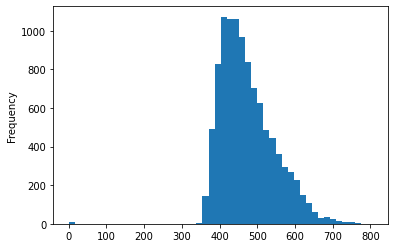

TP_ESCOLA


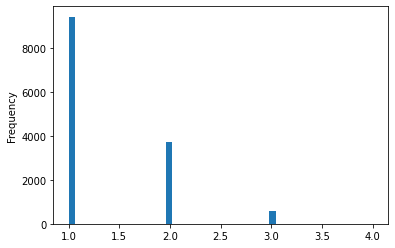

TP_COR_RACA


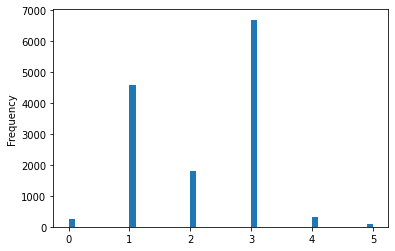

TP_ST_CONCLUSAO


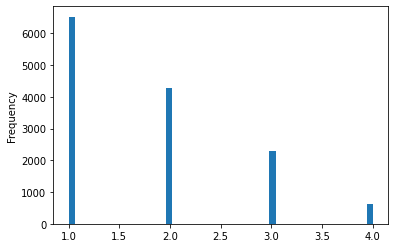

NU_IDADE


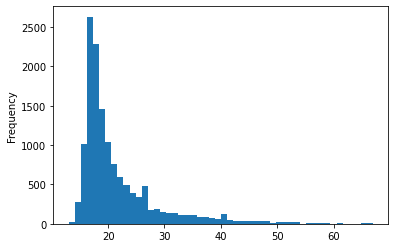

NU_NOTA_COMP2


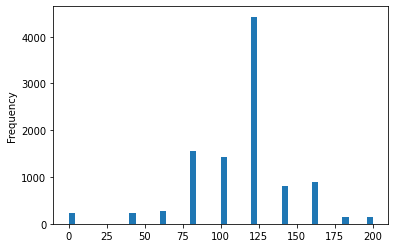

TP_ANO_CONCLUIU


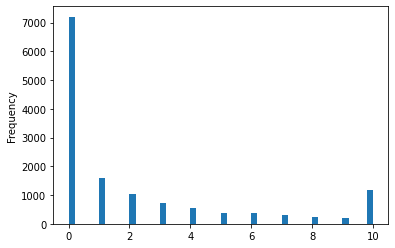

TP_PRESENCA_LC


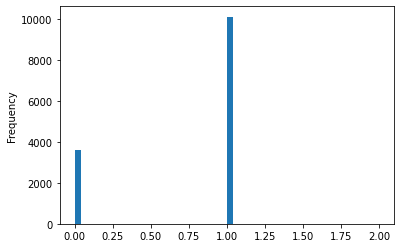

TP_PRESENCA_CH


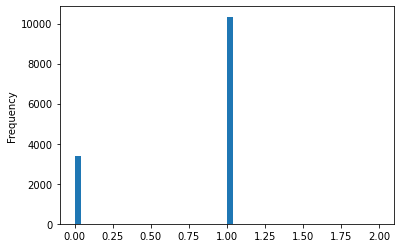

NU_NOTA_COMP3


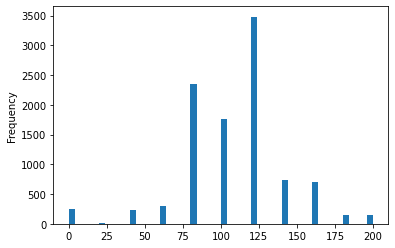

NU_NOTA_LC


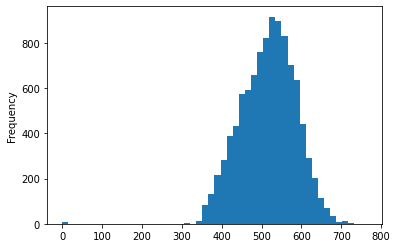

TP_NACIONALIDADE


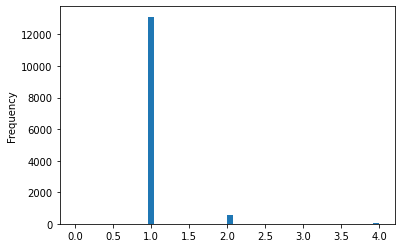

IN_TREINEIRO


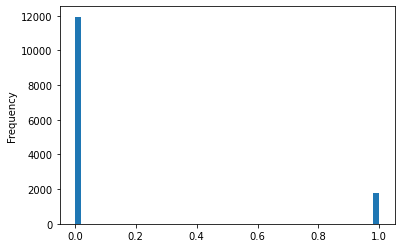

TP_STATUS_REDACAO


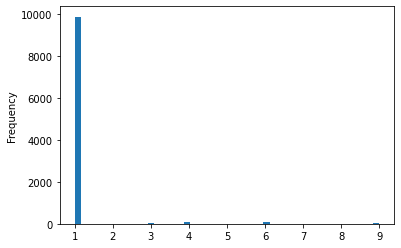

NU_NOTA_COMP1


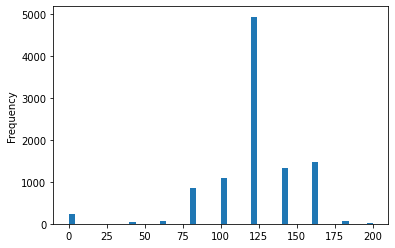

NU_NOTA_CH


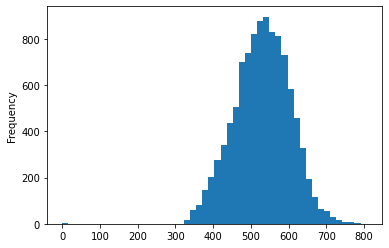

NU_NOTA_REDACAO


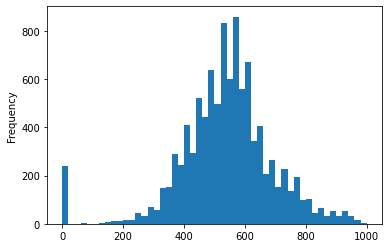

TP_PRESENCA_CN


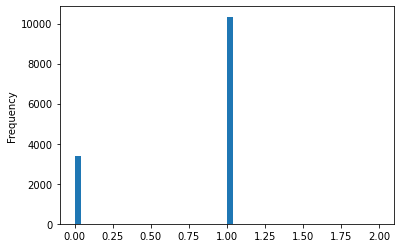

NU_NOTA_COMP5


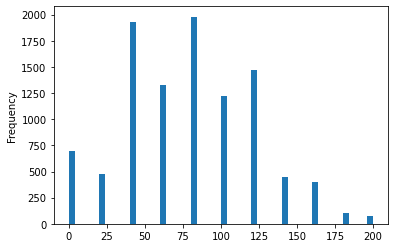

NU_NOTA_COMP4


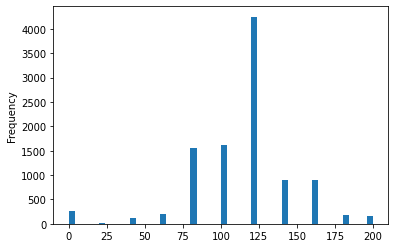

NU_NOTA_MT


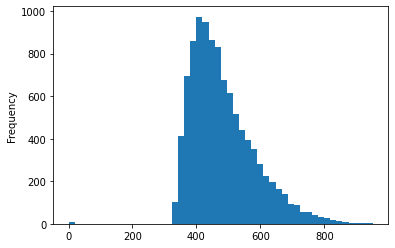

In [144]:
for col in df[variaveis_numericas]:
    print(col)
    df[col].plot.hist(bins=50)
    plt.show()

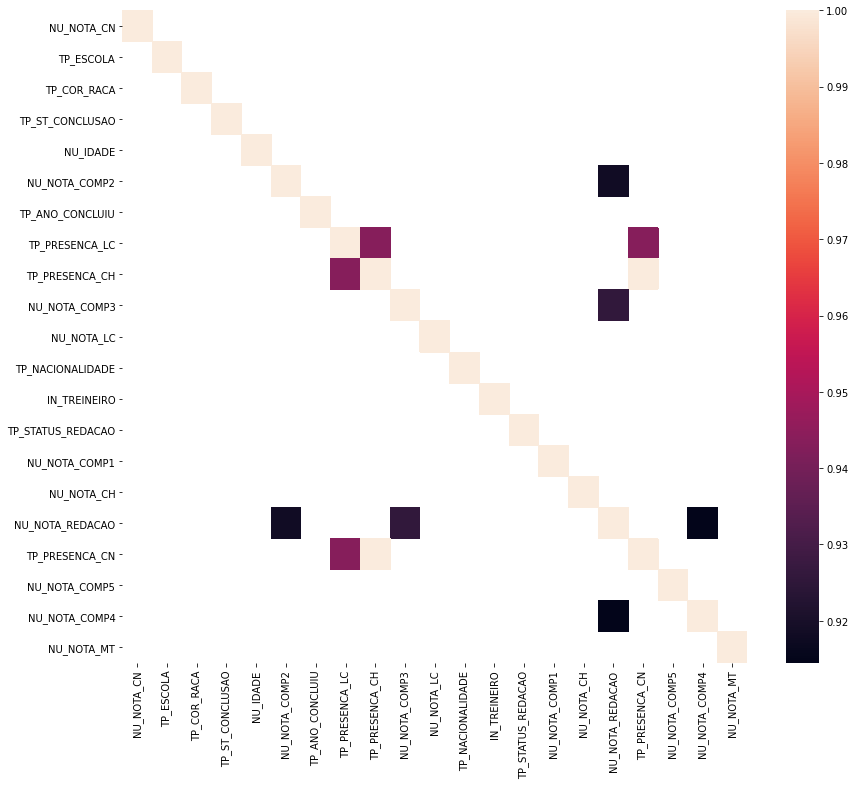

In [145]:
corr = df.corr()
kot = corr[corr>=.9]
plt.figure(figsize=(14,12))
sns.heatmap(kot)

In [146]:
df = df.drop(['TP_PRESENCA_CH', 'TP_PRESENCA_CN'], axis=1)
variaveis_numericas = variaveis_numericas.drop(['TP_PRESENCA_CH', 'TP_PRESENCA_CN'])

In [147]:
df[variaveis_numericas].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13730 entries, 1 to 4586
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NU_NOTA_CN         10341 non-null  float64
 1   TP_ESCOLA          13730 non-null  int64  
 2   TP_COR_RACA        13730 non-null  int64  
 3   TP_ST_CONCLUSAO    13730 non-null  int64  
 4   NU_IDADE           13730 non-null  int64  
 5   NU_NOTA_COMP2      10133 non-null  float64
 6   TP_ANO_CONCLUIU    13730 non-null  int64  
 7   TP_PRESENCA_LC     13730 non-null  int64  
 8   NU_NOTA_COMP3      10133 non-null  float64
 9   NU_NOTA_LC         10133 non-null  float64
 10  TP_NACIONALIDADE   13730 non-null  int64  
 11  IN_TREINEIRO       13730 non-null  int64  
 12  TP_STATUS_REDACAO  10133 non-null  float64
 13  NU_NOTA_COMP1      10133 non-null  float64
 14  NU_NOTA_CH         10341 non-null  float64
 15  NU_NOTA_REDACAO    10133 non-null  float64
 16  NU_NOTA_COMP5      1013

In [148]:
df.dropna(inplace=True)
df_test.dropna(inplace=True)

## Transformando os dados

In [149]:
X = df.drop(['NU_NOTA_MT'], axis=1)
y = df['NU_NOTA_MT']

minmax = MinMaxScaler()

X = pd.get_dummies(X)
X_pred = pd.get_dummies(df_test)

columns = list(set(X_encoded_columns) & set(X_pred.columns))

X = X[columns]
X_pred = X_pred[columns]

X = minmax.fit_transform(X)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [150]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [151]:
y_pred = reg.predict(X_test)

In [152]:
y_pred

array([409.09375, 487.59375, 674.5    , ..., 407.65625, 446.90625,
       487.84375])

## Prevendo os dados de teste

In [153]:
X_pred = minmax.transform(X_pred)
y_pred = reg.predict(X_pred)

In [154]:
answer = df_test['NU_INSCRICAO']

In [155]:
answer

8       043c544a2104aa8a9849f1a703a08d37a2f16839
40      664f44258212a1f7e4086f2b4845d586c543fa3f
43      78de1ee60b55766cc3eba4089e36c57139b66ebd
49      7d39df837488ca3fa6e512fd9e20ec7753b4c36d
71      dbaa6ee7502cbebb6f058fed5d2f960b19f451ac
                          ...                   
4466    478a9061bab1a42882f5aa2cb59d0f5c5247fb1c
4490    ed3238736f06e16b43a5f917369acfe02eb0446e
4501    d441048d32e09849c74fcaed7ca1ef6d7fce35f9
4563    022b5863816f22ed5ed27c9ab648918dc471bd68
4568    c3fa7f85609c5ab50f3f5959950b12b0eb77f7b6
Name: NU_INSCRICAO, Length: 293, dtype: object

In [156]:
answer = pd.DataFrame({'NU_INSCRICAO': df_test['NU_INSCRICAO'].values, 'NU_NOTA_MT': y_pred})

In [159]:
answer

,NU_INSCRICAO,NU_NOTA_MT
0,043c544a2104aa8a9849f1a703a08d37a2f16839,448.18750
1,664f44258212a1f7e4086f2b4845d586c543fa3f,489.81250
2,78de1ee60b55766cc3eba4089e36c57139b66ebd,466.12500
3,7d39df837488ca3fa6e512fd9e20ec7753b4c36d,461.59375
4,dbaa6ee7502cbebb6f058fed5d2f960b19f451ac,429.03125
...,...,...
288,478a9061bab1a42882f5aa2cb59d0f5c5247fb1c,513.56250
289,ed3238736f06e16b43a5f917369acfe02eb0446e,583.34375
290,d441048d32e09849c74fcaed7ca1ef6d7fce35f9,414.71875
291,022b5863816f22ed5ed27c9ab648918dc471bd68,412.03125


In [158]:
answer.to_csv('answer.csv', encoding='utf-8', index=False)